In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Insurance_claim.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

# Here we have 1000 rows and 40 columns

In [4]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

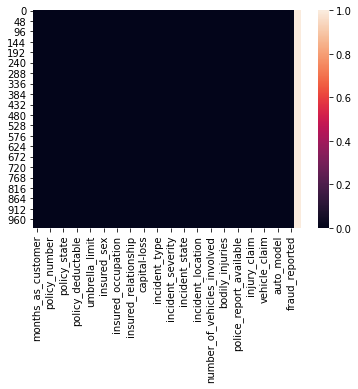

In [7]:
sns.heatmap(df.isnull())

In [8]:
# Droping the columns _c39 as it has no use and won't effect the data set

df.drop("_c39",axis=1,inplace=True)

In [9]:
df.shape

(1000, 39)

<AxesSubplot:>

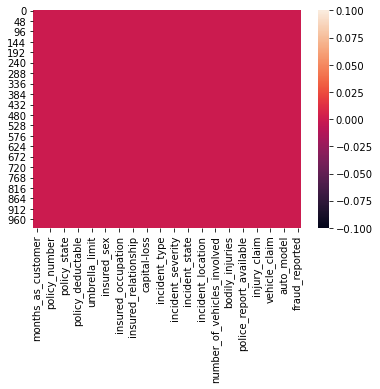

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [12]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

# Feature Engineering

In [13]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors = 'coerce')

In [14]:
df["Date"]=pd.to_datetime(df["policy_bind_date"])
df["Day"]=df["policy_bind_date"].dt.day
df["Month"]=df["policy_bind_date"].dt.month
df["Year"]=df["policy_bind_date"].dt.year
df.drop("policy_bind_date",axis=1,inplace=True)
df.drop("Date",axis=1,inplace=True)

In [15]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Day,Month,Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,6510,13020,52080,Saab,92x,2004,Y,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,780,3510,Mercedes,E400,2007,Y,27,6,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,7700,3850,23100,Dodge,RAM,2007,N,9,6,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1300,650,4550,Accura,RSX,2009,N,6,6,2014


# Visualization

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

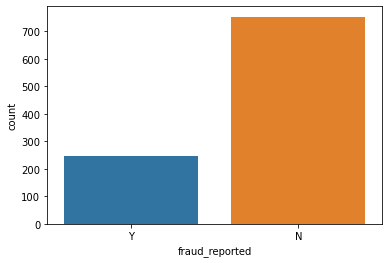

In [16]:
sns.countplot(x="fraud_reported",data=df)

<AxesSubplot:ylabel='Frequency'>

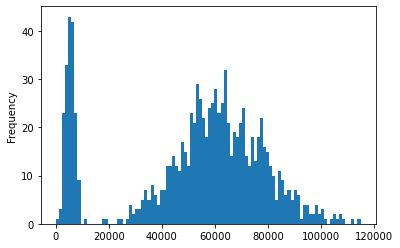

In [17]:
df["total_claim_amount"].plot.hist(bins=100)

<AxesSubplot:xlabel='injury_claim', ylabel='Year'>

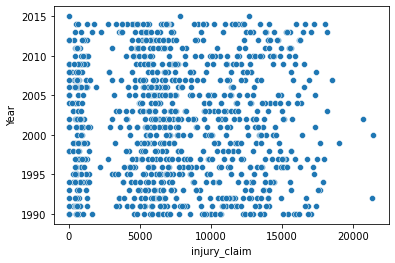

In [18]:
sns.scatterplot(x="injury_claim",y="Year",data=df)

As the visualization shows us that the injury claim has been more in the year between 2000-2010

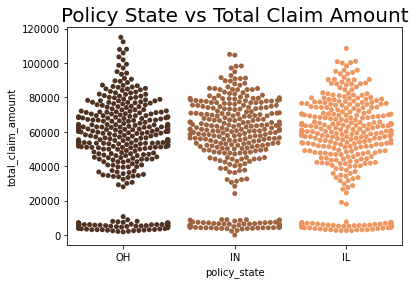

In [19]:
sns.swarmplot(df['policy_state'], df['total_claim_amount'], palette = 'copper')
plt.title('Policy State vs Total Claim Amount', fontsize = 20)
plt.show()

So the OH has state has claim more amount than IN and IL

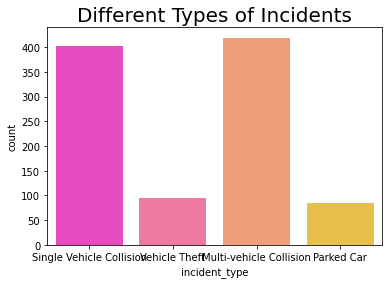

In [20]:
sns.countplot(df['incident_type'], palette = 'spring')
plt.title('Different Types of Incidents', fontsize = 20)
plt.show()

we can see from the above plot that the incident type of Multi-vechile collision hit more than single vechile collision and so on.

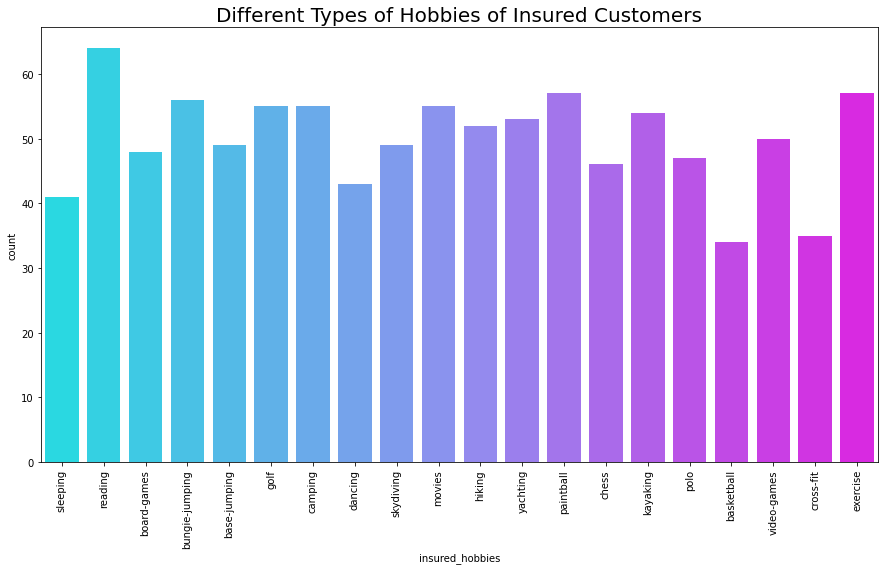

In [21]:
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(df['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Reading is the most in all the cases of insured_hobbies

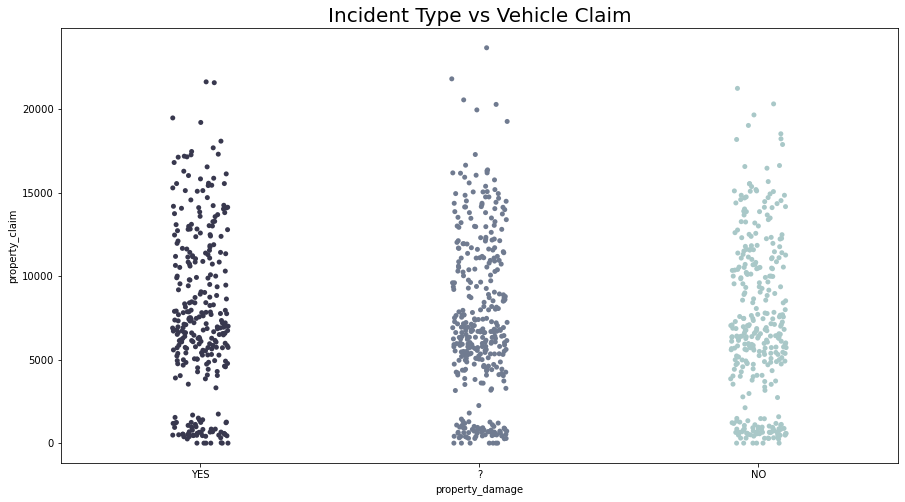

In [22]:
plt.rcParams['figure.figsize'] = (15, 8)

sns.stripplot(df['property_damage'], df['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
plt.show()

In the above case, all x-axis has same amout of property_claim

In [23]:
x=df.collision_type

In [24]:
y=df.incident_type

Text(0, 0.5, 'Incident Type')

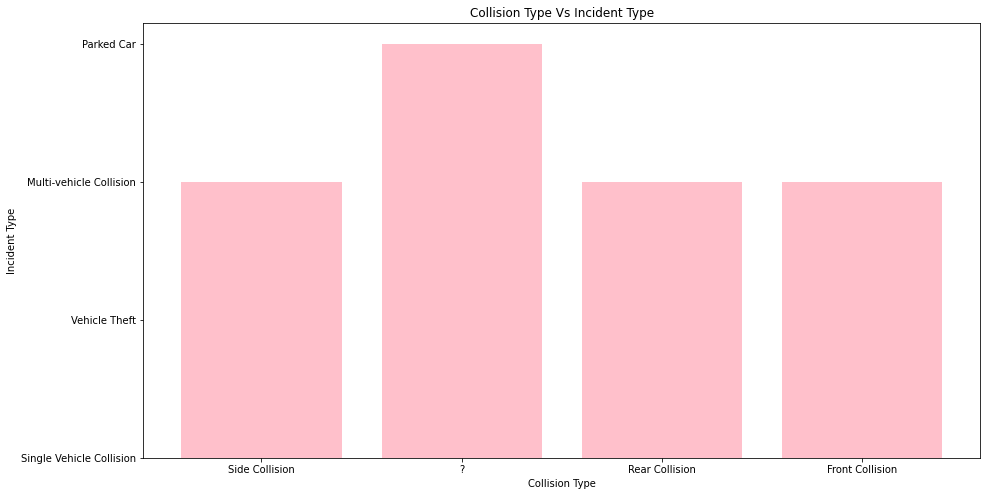

In [25]:
plt.bar(x,y,color="Pink")
plt.title("Collision Type Vs Incident Type")
plt.xlabel("Collision Type")
plt.ylabel("Incident Type")

in the above plot "Side Collision, Rear Collision and front Collision" has same in number respect to incident type, while "? unknown collision has collpased more"

In [26]:
df["insured_occupation"].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

# Data Processing
Cleaning up the data and prepare it for machine learning model.

In [27]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Day,Month,Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,6510,13020,52080,Saab,92x,2004,1,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,780,3510,Mercedes,E400,2007,1,27,6,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,7700,3850,23100,Dodge,RAM,2007,0,9,6,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,6340,50720,Chevrolet,Tahoe,2014,1,25,5,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1300,650,4550,Accura,RSX,2009,0,6,6,2014


In [28]:
df[['insured_zip']] = df[['insured_zip']].astype(object)

In [29]:
df.auto_year.value_counts()  # check the spread of years to decide on further action.


1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [30]:
df['vehicle_age'] = 2018 - df['auto_year'] # Deriving the age of the vehicle based on the year value 
df['vehicle_age'].head(10)

0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [31]:
# Check on categorical variables:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_state', 'policy_csl', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

In [32]:
# dropping unimportant columns

df = df.drop(columns = [
    'policy_number', 
    'insured_zip', 
    'incident_date', 
    'incident_location', 
    'auto_year', 
    'incident_hour_of_the_day'])

df.head(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,Day,Month,Year,vehicle_age
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,6510,13020,52080,Saab,92x,1,17,10,2014,14
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,780,780,3510,Mercedes,E400,1,27,6,2006,11


In [33]:
# identify variables with '?' values
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0


In [34]:
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [35]:
df.police_report_available.value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [36]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'Day', 'Month', 'Year', 'vehicle_age'],
      dtype='object')

In [37]:
df._get_numeric_data().head()  # Checking numeric columns

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,Day,Month,Year,vehicle_age
0,328,48,1000,1406.91,0,53300,0,1,1,2,71610,6510,13020,52080,1,17,10,2014,14
1,228,42,2000,1197.22,5000000,0,0,1,0,0,5070,780,780,3510,1,27,6,2006,11
2,134,29,2000,1413.14,5000000,35100,0,3,2,3,34650,7700,3850,23100,0,9,6,2000,11
3,256,41,2000,1415.74,6000000,48900,-62400,1,1,2,63400,6340,6340,50720,1,25,5,1990,4
4,228,44,1000,1583.91,6000000,66000,-46000,1,0,1,6500,1300,650,4550,0,6,6,2014,9


In [38]:
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'Day', 'Month', 'Year',
       'vehicle_age'],
      dtype='object')

# Applying one-hot encoding to convert all categorical variables except out target variables¶

'collision_type', 'property_damage', 'police_report_available', 'fraud_reported'



In [39]:
dummies = pd.get_dummies(df[[
    'policy_state', 
    'policy_csl', 
    'insured_sex', 
    'insured_education_level',
    'insured_occupation', 
    'insured_hobbies', 
    'insured_relationship',
    'incident_type', 
    'incident_severity',
    'authorities_contacted', 
    'incident_state', 
    'incident_city',
    'auto_make', 
    'auto_model']])

    
dummies = dummies.join(df[[ 
    'collision_type',
    'property_damage', 
    'police_report_available', 
    "fraud_reported"]])

dummies.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,collision_type,property_damage,police_report_available,fraud_reported
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,Side Collision,YES,YES,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,?,?,?,1
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,Rear Collision,NO,NO,0
3,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,Front Collision,?,NO,1
4,1,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,?,NO,NO,0


In [40]:
X = dummies.iloc[:, 0:-1]
y = dummies.iloc[:, -1]

In [41]:
len(X.columns)

138

In [42]:
X.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,collision_type,property_damage,police_report_available
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,Side Collision,YES,YES
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,?,?,?


In [43]:
y.head

<bound method NDFrame.head of 0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64>

In [44]:
from sklearn.preprocessing import LabelEncoder
X['collision_en'] = LabelEncoder().fit_transform(dummies['collision_type'])
X[['collision_type', 'collision_en']]

,collision_type,collision_en
0,Side Collision,3
1,?,0
2,Rear Collision,2
3,Front Collision,1
4,?,0
...,...,...
995,Front Collision,1
996,Rear Collision,2
997,Side Collision,3
998,Rear Collision,2


In [45]:
X['property_damage'].replace(to_replace='YES', value=1, inplace=True)
X['property_damage'].replace(to_replace='NO', value=0, inplace=True)
X['property_damage'].replace(to_replace='?', value=0, inplace=True)
X['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
X['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
X['police_report_available'].replace(to_replace='?', value=0, inplace=True)

X.head(10)

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,collision_type,property_damage,police_report_available,collision_en
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,Side Collision,1,1,3
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,?,0,0,0
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,Rear Collision,0,0,2
3,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,Front Collision,0,0,1
4,1,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,?,0,0,0
5,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,Rear Collision,0,0,2
6,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,Front Collision,0,0,1
7,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,Front Collision,0,1,1
8,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,Front Collision,0,1,1
9,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,Rear Collision,0,0,2


In [46]:
X.drop("collision_type",axis=1,inplace=True)

In [47]:
X = pd.concat([X, df._get_numeric_data()], axis=1)  # joining numeric columns
X.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,Day,Month,Year,vehicle_age
0,0,0,1,0,1,0,0,1,0,0,...,2,71610,6510,13020,52080,1,17,10,2014,14
1,0,1,0,0,1,0,0,1,0,0,...,0,5070,780,780,3510,1,27,6,2006,11


In [48]:
X = X.drop(columns = ['fraud_reported'])
X.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'policy_csl_100/300', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       ...
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'Day', 'Month', 'Year',
       'vehicle_age'],
      dtype='object', length=156)

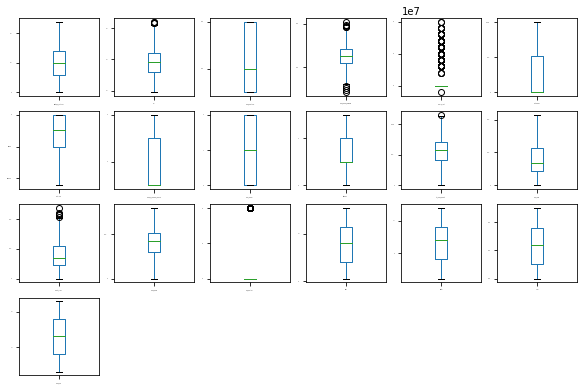

In [49]:
df.plot(kind="box",subplots=True,layout=(6,6),sharex=False,legend=False,fontsize=1,figsize=(10,10))
plt.show()

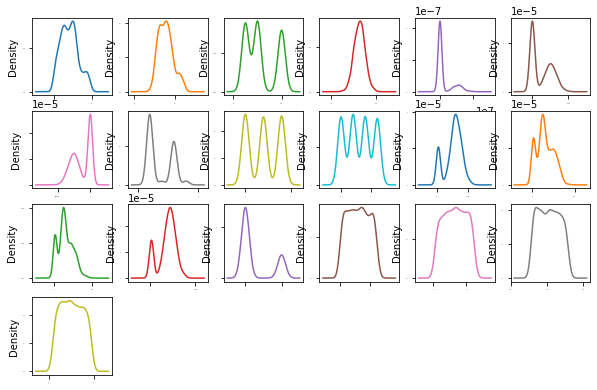

In [50]:
df.plot(kind="density",subplots=True,layout=(6,6),sharex=False,legend=False,fontsize=1,figsize=(10,10))
plt.show()

In [51]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
#Removing Outliers using IQR method
df_new=df[~((df < (Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]

In [52]:
df_new.shape

(600, 36)

In [53]:
loss_percentage=(1000-600)/1000*100
print(loss_percentage)

40.0


In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-0.71454462, -0.67028006,  1.35680105, ...,  1.01502574,
         1.68499231,  0.1834404 ],
       [-0.71454462,  1.49191369, -0.73702773, ..., -0.16489375,
         0.59754971, -0.31549088],
       [-0.71454462, -0.67028006,  1.35680105, ..., -0.16489375,
        -0.21803224, -0.31549088],
       ...,
       [-0.71454462, -0.67028006,  1.35680105, ..., -1.34481324,
         0.18975873,  1.5139238 ],
       [ 1.39949272, -0.67028006, -0.73702773, ...,  1.31000562,
         1.27720133,  1.18130295],
       [-0.71454462, -0.67028006,  1.35680105, ...,  1.31000562,
        -0.76175354, -0.31549088]])

# Finding The Best Random State

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
maxAucc=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    le=LogisticRegression()
    le.fit(X_train,y_train)
    pred=le.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAucc:
        maxAucc=acc
        maxRS=i
print("Best Accuracy is ",maxAucc,"on random_state",maxRS)

Best Accuracy is  0.8666666666666667 on random_state 115


# Creating Train Test Split

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=115)

In [59]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print(accuracy_score(y_test,pred))

0.8666666666666667


In [60]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
pred=dtc.predict(X_test)
print(accuracy_score(y_test,pred))

0.8066666666666666


In [61]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print(accuracy_score(y_test,pred))

0.7933333333333333


In [62]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
pred=svc.predict(X_test)
print(accuracy_score(y_test,pred))

0.7966666666666666


In [63]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
pred=kn.predict(X_test)
print(accuracy_score(y_test,pred))

0.7266666666666667


In [64]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(X_train,y_train)
pred=etc.predict(X_test)
print(accuracy_score(y_test,pred))

0.7966666666666666


# Hyper Paramenter Tuning

In [68]:
from sklearn.model_selection import GridSearchCV

In [70]:
#creating parameter list to pass in GridSearchCV

parameters={"C":np.arange(2,15),
           "penalty":["l1", "l2","elasticnet"]}
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5) 
GCV.fit(X_train,y_train)
GCV.best_params_

{'C': 2, 'penalty': 'l2'}

In [73]:
lr_mod=LogisticRegression(C=2,penalty="l2")

lr_mod.fit(X_train,y_train)
pred=lr_mod.predict(X_test)
print(accuracy_score(y_test,pred)*100)

86.0


In [74]:
#creating parameter list to pass in GridSearchCV

parameters={"max_depth":np.arange(2,15),
           "splitter":["best", "random",]}
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5) 
GCV.fit(X_train,y_train)
GCV.best_params_

{'max_depth': 3, 'splitter': 'random'}

In [75]:
dtc_mod=DecisionTreeClassifier(max_depth=3,splitter="random")

dtc_mod.fit(X_train,y_train)
pred=dtc_mod.predict(X_test)
print(accuracy_score(y_test,pred)*100)

87.33333333333333


In [76]:
#creating parameter list to pass in GridSearchCV

parameters={"n_estimators":np.arange(2,15),
           "criterion":["gini", "entropy",]}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5) 
GCV.fit(X_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'n_estimators': 9}

In [77]:
rf_mod=RandomForestClassifier(n_estimators=9,criterion="gini")

rf_mod.fit(X_train,y_train)
pred=rf_mod.predict(X_test)
print(accuracy_score(y_test,pred)*100)

78.0


In [80]:
#creating parameter list to pass in GridSearchCV

parameters={"C":np.arange(2,15),
           "kernel":["linear", "poly","rbf","sigmoid"]}
GCV=GridSearchCV(SVC(),parameters,cv=5) 
GCV.fit(X_train,y_train)
GCV.best_params_

{'C': 8, 'kernel': 'sigmoid'}

In [81]:
svc_mod=SVC(C=8,kernel="sigmoid")

svc_mod.fit(X_train,y_train)
pred=svc_mod.predict(X_test)
print(accuracy_score(y_test,pred)*100)

88.0


In [82]:
#creating parameter list to pass in GridSearchCV

parameters={"n_neighbors":np.arange(2,15),
           "weights":["uniform", "distance"]}
GCV=GridSearchCV(KNeighborsClassifier(),parameters,cv=5) 
GCV.fit(X_train,y_train)
GCV.best_params_

{'n_neighbors': 13, 'weights': 'uniform'}

In [83]:
kn_mod=KNeighborsClassifier(n_neighbors=13,weights="uniform")

kn_mod.fit(X_train,y_train)
pred=kn_mod.predict(X_test)
print(accuracy_score(y_test,pred)*100)

75.66666666666667


In [84]:
#creating parameter list to pass in GridSearchCV

parameters={"n_estimators":np.arange(2,15),
           "criterion":["gini", "entropy"]}
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5) 
GCV.fit(X_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'n_estimators': 13}

In [86]:
etc_mod=ExtraTreesClassifier(n_estimators=13,criterion="entropy")

etc_mod.fit(X_train,y_train)
pred=etc_mod.predict(X_test)
print(accuracy_score(y_test,pred)*100)

81.33333333333333


# Plotting AUC and ROC Curve

In [88]:
from sklearn.metrics import plot_roc_curve

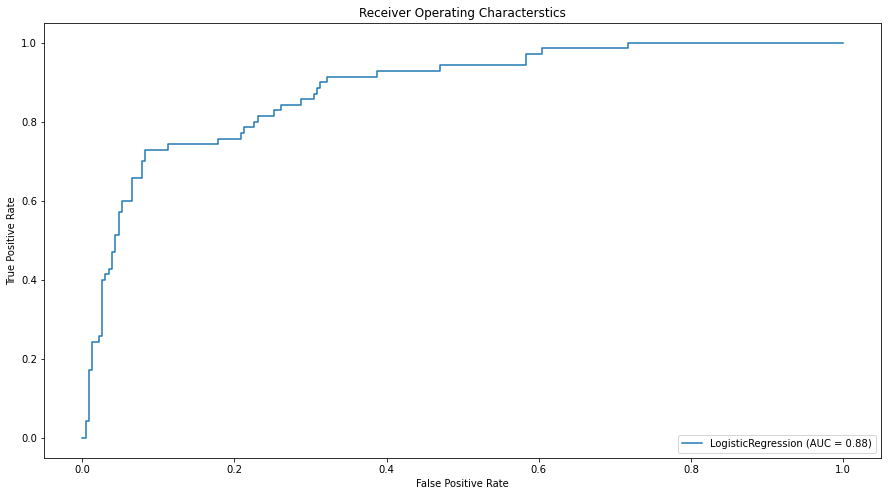

In [90]:
plot_roc_curve(lr_mod,X_test,y_test)
plt.title("Receiver Operating Characterstics")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

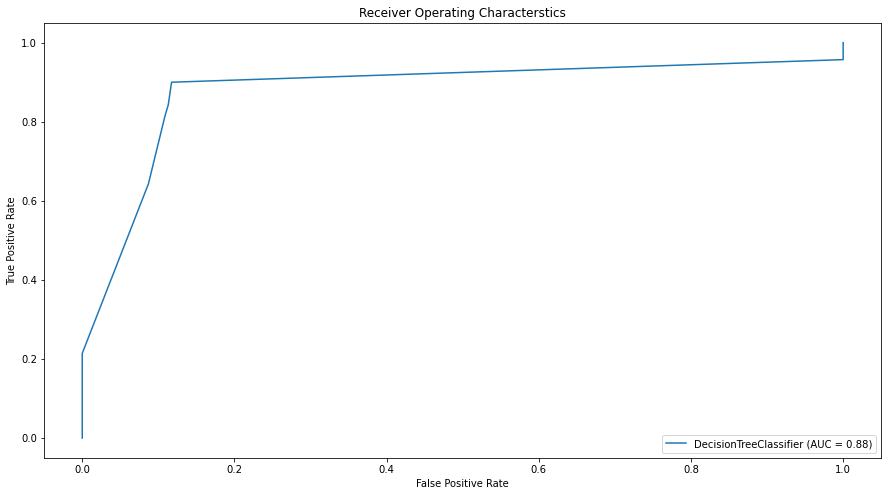

In [92]:
plot_roc_curve(dtc_mod,X_test,y_test)
plt.title("Receiver Operating Characterstics")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

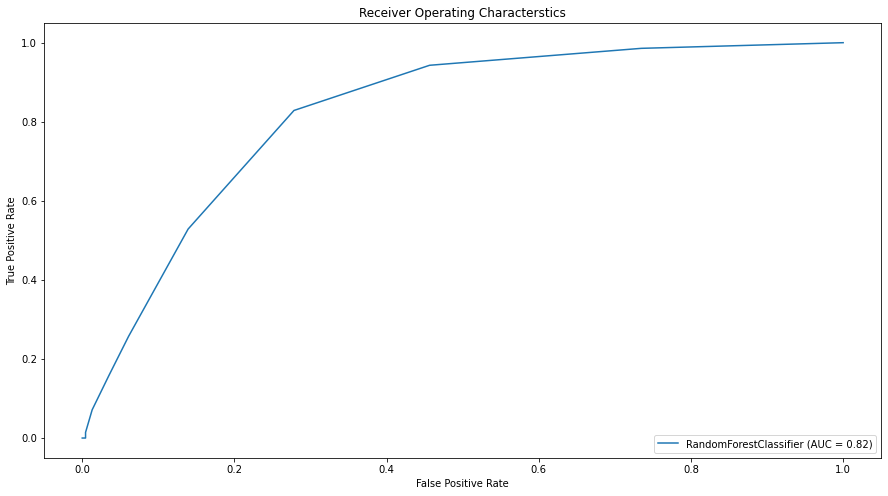

In [93]:
plot_roc_curve(rf_mod,X_test,y_test)
plt.title("Receiver Operating Characterstics")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

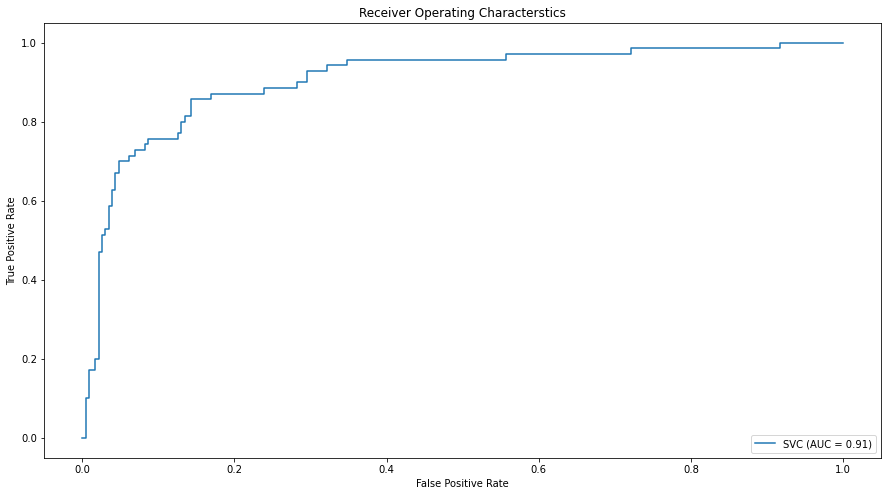

In [94]:
plot_roc_curve(svc_mod,X_test,y_test)
plt.title("Receiver Operating Characterstics")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

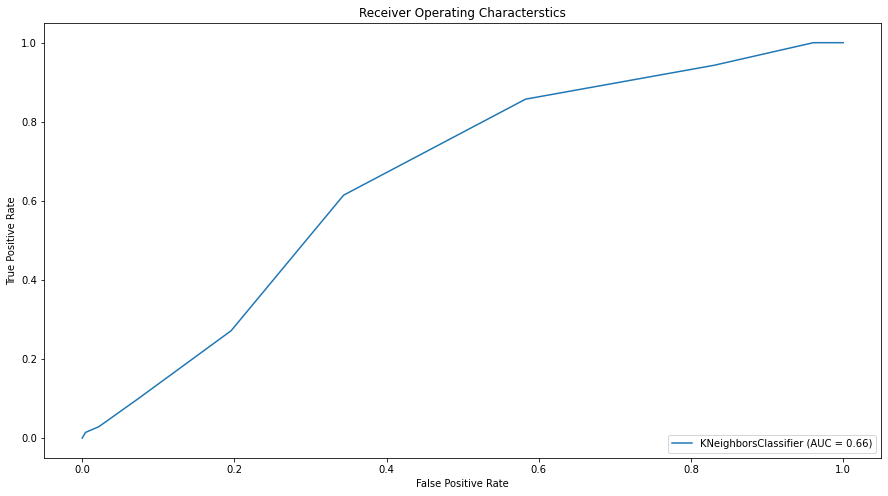

In [95]:
plot_roc_curve(kn_mod,X_test,y_test)
plt.title("Receiver Operating Characterstics")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

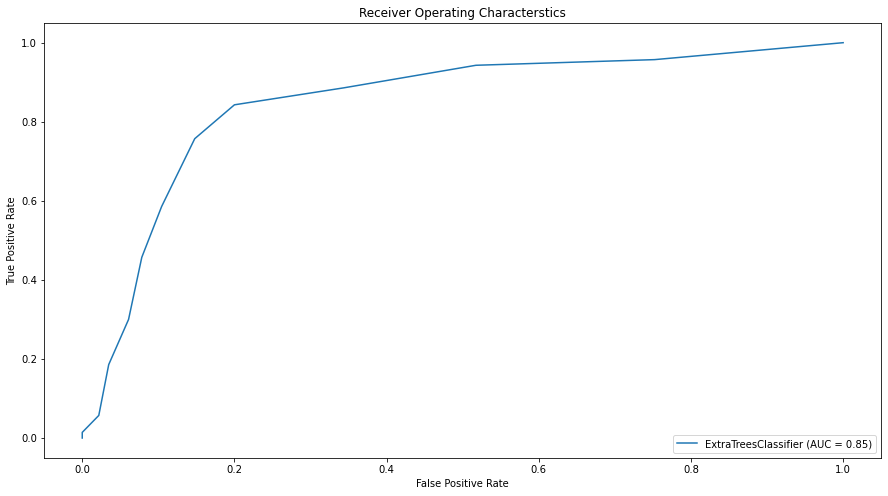

In [96]:
plot_roc_curve(etc_mod,X_test,y_test)
plt.title("Receiver Operating Characterstics")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Saving the Model

In [98]:
import joblib
joblib.dump(svc_mod,"insurance.pkl")

['insurance.pkl']